In [1]:
import pandas as pd
df=pd.read_csv("C:/Users/win 10/Downloads/Iris_Data.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

##### Scikit-learn is a popular Python library for Machine Learning (ML).

It provides easy-to-use tools for:
Classification (e.g., Logistic Regression, Decision Trees, SVM)
Regression (predicting numbers)
Clustering (e.g., K-Means)
Model evaluation (accuracy, confusion matrix, etc.)
Data preprocessing (splitting, scaling, encoding, etc.)

##### from sklearn.model_selection import train_test_split
This function is used to split your dataset into two parts:training set and testing set.
##### from sklearn.linear_model import LogisticRegression
This imports the Logistic Regression algorithm from scikit-learn.
Logistic Regression is a classification algorithm (not just for regression).
It predicts categories, e.g., Iris-setosa, Iris-versicolor, Iris-virginica.

##### from sklearn.metrics import accuracy_score, classification_report

accuracy_score → Tells you how many predictions were correct out of all predictions.
Example: If the model predicted 90 correct out of 100, accuracy = 0.90 (90%).
classification_report → Gives a detailed report:
Precision → How many predicted positives are actually positive.
Recall → How many actual positives were correctly identified.
F1-score → Balance between precision and recall.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [16]:
print(df["species"].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [5]:
#Features (X) = Sepal & Petal columns
X = df[["sepal_length", "sepal_width","petal_length","petal_width"]]
# Target (y) = Species
y = df["species"]

In [6]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Train the model
model=LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [8]:
# Test the model
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## Regression

In [9]:
# Features (independent variables) → using Sepal & Petal widths/lengths except target
X = df[["sepal_length", "sepal_width","petal_width"]]

# Target (dependent variable) → PetalLengthCm
y = df["petal_length"]

In [10]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Tain regression model
from sklearn.linear_model import LinearRegression   
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
from sklearn.metrics import mean_squared_error, r2_score   
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.1299198160575995
R² Score: 0.9603587427485161


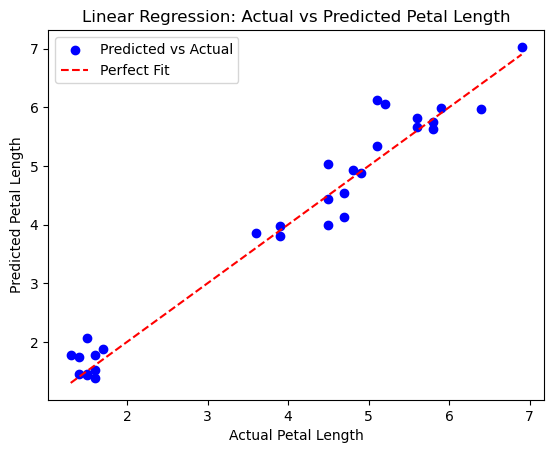

In [13]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted
plt.scatter(y_test, y_pred, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Perfect Fit")

plt.xlabel("Actual Petal Length")
plt.ylabel("Predicted Petal Length")
plt.title("Linear Regression: Actual vs Predicted Petal Length")
plt.legend()
plt.show()


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import LabelEncoder, label_binarize
import numpy as np

# Features and target
X = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y = df["species"]

# Convert species labels (Iris-setosa → 0, Iris-versicolor → 1, Iris-virginica → 2)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy, Precision, Recall, F1
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="macro"))
print("Recall:", recall_score(y_test, y_pred, average="macro"))
print("F1 Score:", f1_score(y_test, y_pred, average="macro"))

# ROC-AUC (for multiclass → one-vs-rest)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = model.predict_proba(X_test)
print("ROC-AUC:", roc_auc_score(y_test_bin, y_pred_prob, average="macro", multi_class="ovr"))

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



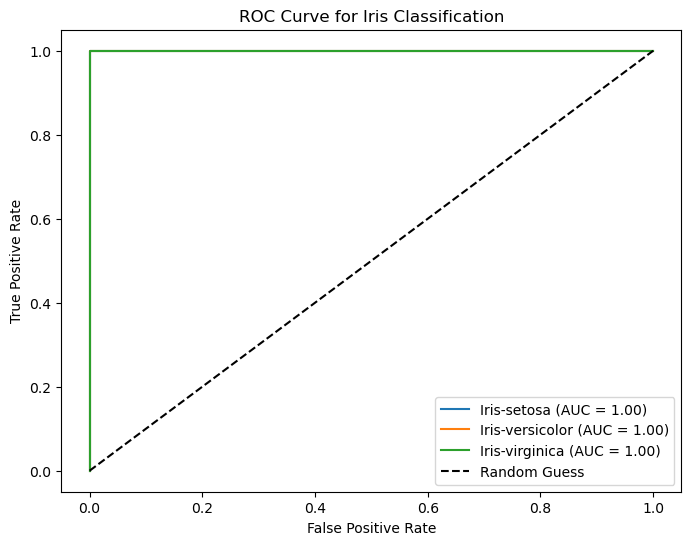

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize target for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = model.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(8,6))
for i in range(3):  # 3 classes in iris
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{le.classes_[i]} (AUC = {roc_auc:.2f})")

# Plot random guess line
plt.plot([0,1], [0,1], "k--", label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Iris Classification")
plt.legend(loc="lower right")
plt.show()